# HealthCare Dataset
##### Data Source: Kaggle Healthcare Dataset (kaggle.com)

### Introduction:


This healthcare dataset captures detailed patient information across multiple dimensions of medical and business operations. 
Each row represents a patient admission record, with columns that combine clinical data, administrative details, and financial transactions. The dataset includes patient demographics such as Name, Age, Gender, and Blood Type, which help in understanding population patterns and treatment outcomes.

From the medical perspective, we have Medical Condition, Date of Admission, Discharge Date, Doctor, Hospital, Medication, and Test Results, which outline the full treatment journey of each patient from diagnosis to outcome. This allows us to explore questions like which conditions dominate admissions, how long patients typically stay, which medications are most prescribed, and how effective they are based on test results.

From the business perspective, columns such as Insurance Provider, Billing Amount, Room Number, and Admission Type shed light on the financial side of healthcare delivery. This enables analysis of revenue drivers, cost patterns, insurance efficiency, and the role of admission types (urgent, emergency, elective) in shaping hospital operations.

Overall, this dataset is not just a list of medical records—it represents the intersection of clinical care, hospital management, and financial performance. With it, we can uncover insights that matter to doctors (treatment effectiveness), patients (care outcomes), hospitals (operational efficiency), and insurers (cost management).


#### Tools Used: Python (Pandas, Matplotlib, Seaborn), Jupyter Notebook
Note: All charts below are generated with Matplotlib/Seaborn, and saved as images for documentation.

# Data Dictionary

 Name:            Names of the patients admitted to the hospital.
 
 Age:             Age of the patients at the time of admission.
 
 Gender:          Gender of the patients (e.g., male, female).
 
 Blood Type:      Blood type of the patients.
 
 Medical Condition: Description of the medical condition or diagnosis for which the patient is admitted.
 
 Date of Admission: Date when the patient was admitted to the hospital.
 
 Doctor: Name or identifier of the doctor responsible for the patient's care.
 
 Hospital: Name or identifier of the hospital where the patient is admitted.
 
 Insurance Provider: Name of the insurance provider covering the patient's medical expenses.
 
 Billing Amount: Amount billed to the patient or their insurance provider for medical services received during the hospital stay.
 
 Room Number: Identifier of the room where the patient is accommodated.
 
 Admission Type: Type of admission, such as emergency, elective, or transfer.
 
 Discharge Date: Date when the patient was discharged from the hospital.
 
 Medication: List of medications prescribed to the patient during their hospitalization.
 
 Test Results: Results of medical tests conducted on the patient during their hospital stay.

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load in the dataset
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
#understanding the columns and row of the datset
df.shape

(55500, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
#get the statistics of the numerical column
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
#check for duplicate entries
df.duplicated().sum()

534

In [7]:
# confirm true duplicates
df[df.duplicated(keep=False)].sort_values(by=["Name", "Date of Admission"])

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
42407,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal
54285,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal
26025,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive
53104,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive
42323,AMy GREEN,79,Female,B+,Obesity,2021-03-30,Brett Johnson,Taylor-Williamson,UnitedHealthcare,23402.358491,249,Elective,2021-04-27,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
27374,willIAM DUnCan,78,Female,B-,Arthritis,2019-08-04,Margaret Rice,"and Hobbs Rice, Miller",UnitedHealthcare,4537.845577,383,Elective,2019-08-17,Aspirin,Abnormal
53693,willIAM DUnCan,78,Female,B-,Arthritis,2019-08-04,Margaret Rice,"and Hobbs Rice, Miller",UnitedHealthcare,4537.845577,383,Elective,2019-08-17,Aspirin,Abnormal
6345,zaCHAry balL,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.547262,202,Emergency,2020-05-25,Penicillin,Inconclusive


In [8]:
# drop exact duplicates
df = df.drop_duplicates()

In [9]:
# check for validation after dropping
print(df.shape)
print(df.duplicated().sum())

(54966, 15)
0


In [10]:
# check for nan values
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# DATA CLEANING

For quality data check in this dataset, you would notice errorneous values, inconsistencies, messy data that could mislead my analysis.

Therefore,some cleaning Steps needs to be carried out before EDA.

- Standardize text (names, hospitals, doctors, categorical columns).

- Convert Date of Admission & Discharge Date to datetime.

- Create new column: Length of Stay = Discharge – Admission.

- Round billing to 2 decimals.

- Normalize categorical fields (Test Results, Admission Type).

In [11]:
# Standardize text (Title Case for names, doctors, hospitals)
df["Name"] = df["Name"].str.title().str.strip()
df["Doctor"] = df["Doctor"].str.title().str.strip()
df["Hospital"] = df["Hospital"].str.title().str.strip().str.rstrip(",")

In [12]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Hernandez Rogers And Vang,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,And Mahoney Johnson Vasquez,UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,Jackson Todd And Castro,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [13]:
# Normalize categorical values
df["Admission Type"] = df["Admission Type"].str.title().str.strip()
df["Test Results"] = df["Test Results"].str.replace(".", "", regex=False).str.title().str.strip()

In [14]:
# Convert dates to the proper data type
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

In [15]:
df.shape

(54966, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [17]:
# Round billing amount column
df["Billing Amount"] = df["Billing Amount"].round(2)

In [18]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Hernandez Rogers And Vang,Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,And Mahoney Johnson Vasquez,UnitedHealthcare,27620.76,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,Jackson Todd And Castro,Medicare,32451.09,321,Elective,2019-05-31,Ibuprofen,Abnormal


# Exploratory Data Analysis(EDA)

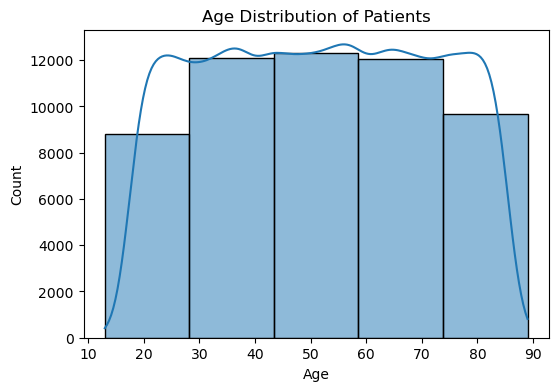

In [19]:
# Distribution of Ages
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=5, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

#### Most patients are between 30–60 years old, suggesting middle-aged adults form the majority.

C:\Users\DELL 5300\AppData\Local\Temp\ipykernel_7588\4081639442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=df, palette="pastel")


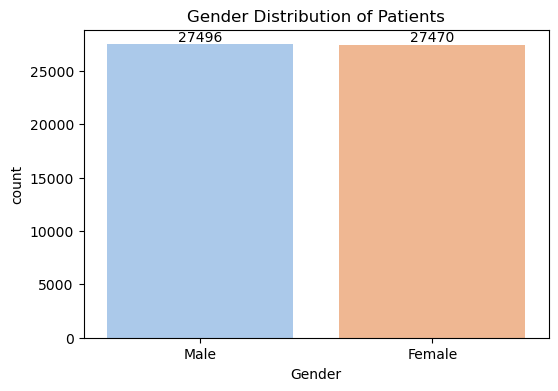

In [36]:
# Gender distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Gender", data=df, palette="pastel")

# Add labels for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',       # the count
                (p.get_x() + p.get_width()/2.,  # x position
                 p.get_height()),               # y position
                ha='center', va='bottom', fontsize=10)

plt.title("Gender Distribution of Patients")
plt.savefig("gender_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

##### Male patients slightly outnumber female patients in the dataset.

## Create additional columns for further analysis

In [37]:
# Create Length of Stay feature, this column might be helpful for analysis later
df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

In [21]:
# Age groups
bins = [0, 18, 35, 55, 75, 100]
labels = ["Child", "Young Adult", "Middle-aged", "Senior", "Elderly"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

In [22]:
# Cost per day
df["Cost per Day"] = (df["Billing Amount"] / df["Length of Stay"]).round(2)

In [23]:
# Critical admission flag
df["Critical Case"] = df["Admission Type"].apply(lambda x: "Critical" if x in ["Emergency", "Urgent"] else "Non-Critical")

In [24]:
# Outcome score
outcome_map = {"Normal": 1, "Inconclusive": 0, "Abnormal": -1}
df["Outcome Score"] = df["Test Results"].map(outcome_map)

In [25]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Age Group,Cost per Day,Critical Case,Outcome Score
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,2,Young Adult,9428.14,Critical,1
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Senior,5607.22,Critical,0
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,15,Elderly,1863.67,Critical,1
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,Hernandez Rogers And Vang,Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Young Adult,1263.66,Non-Critical,-1
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Middle-aged,711.92,Critical,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.71,417,Elective,2020-09-15,Penicillin,Abnormal,30,Middle-aged,88.36,Non-Critical,-1
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.80,316,Elective,2020-02-01,Aspirin,Normal,9,Senior,3495.31,Non-Critical,1
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs Dvm,And Mahoney Johnson Vasquez,UnitedHealthcare,27620.76,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28,Middle-aged,986.46,Critical,-1
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,Jackson Todd And Castro,Medicare,32451.09,321,Elective,2019-05-31,Ibuprofen,Abnormal,6,Middle-aged,5408.52,Non-Critical,-1


In [26]:
df.shape

(54966, 20)

# Data Visualization

### Question 1: What is the Average Cost per Day by Medical Condition?

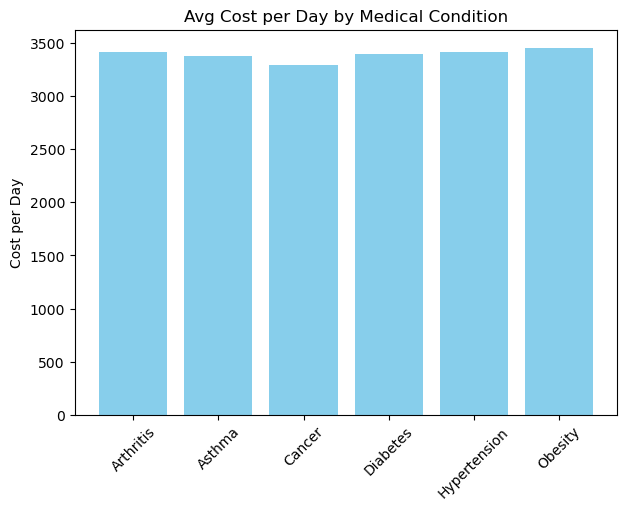

In [41]:
# Aggregate first
cond_cost = df.groupby("Medical Condition")["Cost per Day"].mean().reset_index()

# Simple bar plot
plt.figure(figsize=(7,5))
plt.bar(cond_cost["Medical Condition"], cond_cost["Cost per Day"], color="skyblue")
plt.title("Avg Cost per Day by Medical Condition")
plt.xticks(rotation=45)
plt.ylabel("Cost per Day")
plt.savefig("avg_treatment_cost.png", dpi=300, bbox_inches='tight')
plt.show()

#### Every other medical condition seem to incur the highest average cost except for cancer.

In [39]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay', 'Age Group',
       'Cost per Day', 'Critical Case', 'Outcome Score'],
      dtype='object')

### Question 2: Average Length of Stay by Insurance Provider?

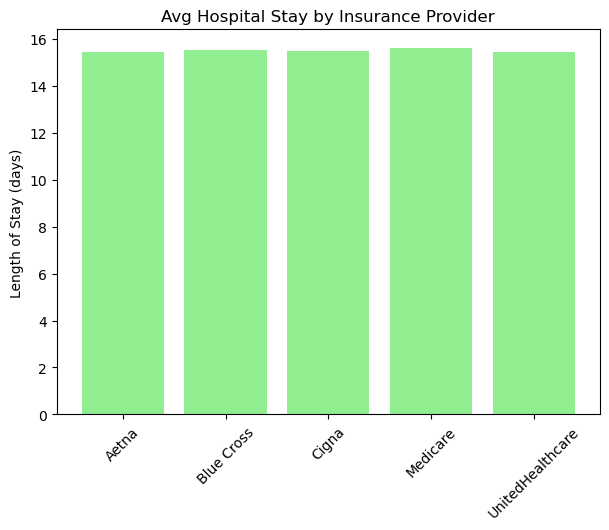

In [43]:
ins_stay = df.groupby("Insurance Provider")["Length of Stay"].mean().reset_index()

plt.figure(figsize=(7,5))
plt.bar(ins_stay["Insurance Provider"], ins_stay["Length of Stay"], color="lightgreen")
plt.title("Avg Hospital Stay by Insurance Provider")
plt.xticks(rotation=45)
plt.ylabel("Length of Stay (days)")
plt.savefig("avg_length_of_stay.png", dpi=300, bbox_inches='tight')
plt.show()

#####  The choice of insurance provider have little or no effect on the length of stay at the hospital.

### Question 3: What is the Revenue generated by Doctor?

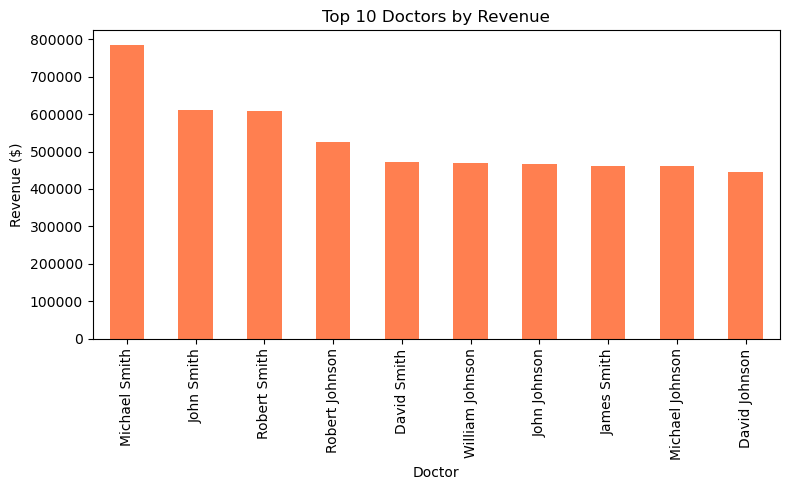

In [44]:
doc_revenue = df.groupby("Doctor")["Billing Amount"].sum().nlargest(10)

doc_revenue.plot(kind="bar", figsize=(8,5), color="coral")
plt.title("Top 10 Doctors by Revenue")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.savefig("Rev_Doctors_generated.png", dpi=300, bbox_inches='tight')
plt.show()

##### This chart depicts that this Top 10 doctors generated more revenue to the hospital. Its either they worked extra shift, were consultants or the patients specifically asked for their services.

### Question 4: What is the Patient Distribution by Age Group?

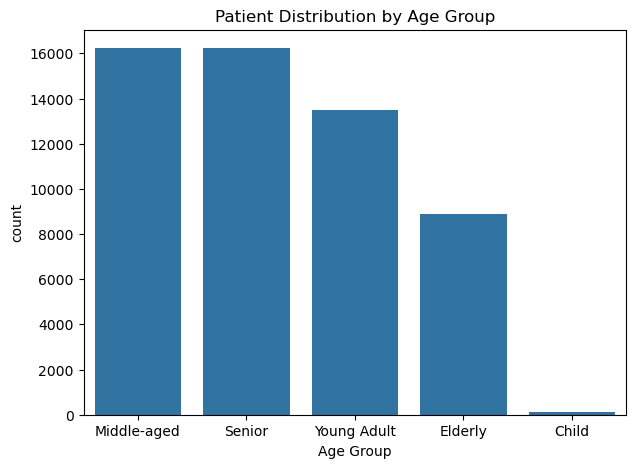

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Age Group", order=df["Age Group"].value_counts().index)
plt.title("Patient Distribution by Age Group")
plt.savefig("Patient_Age-group_Distribution.png", dpi=300, bbox_inches='tight')

plt.show()

##### This chart shows the age group of patients with the prevailing medical conditions are mostly Middle-aged,Senior and Young Adult Age group.

### Question 5: What is the outcome of the medications administered to patients?

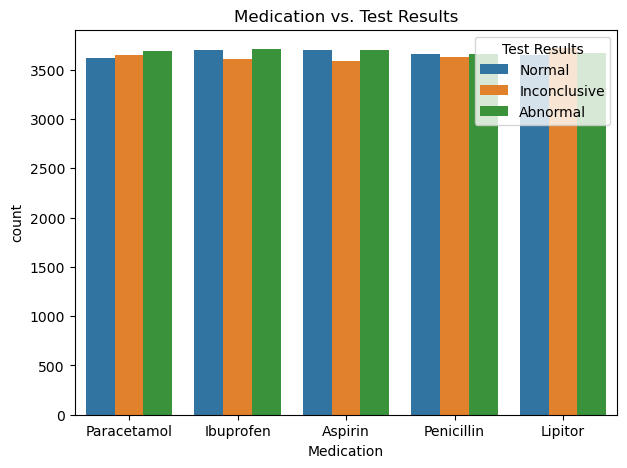

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Medication", hue="Test Results")
plt.title("Medication vs. Test Results")
plt.savefig("Medication_Outcome.png", dpi=300, bbox_inches='tight')
plt.show()

#### The chart above shows that NO significant difference between the results after ahministering medication.